# **DATA PREPROCESSING**

In [343]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [344]:
data=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [345]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [346]:
data = data.rename(columns={'Classes  ': 'Classes'})

In [347]:
data.drop(columns='day',axis=1,inplace=True)
data.drop(columns='month',axis=1,inplace=True)
data.drop(columns='year',axis=1,inplace=True)
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [348]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  245 non-null    object
 1    RH          245 non-null    object
 2    Ws          245 non-null    object
 3   Rain         245 non-null    object
 4   FFMC         245 non-null    object
 5   DMC          245 non-null    object
 6   DC           245 non-null    object
 7   ISI          245 non-null    object
 8   BUI          245 non-null    object
 9   FWI          245 non-null    object
 10  Classes      244 non-null    object
dtypes: object(11)
memory usage: 21.3+ KB


In [349]:
uniqueValues = data['Classes'].unique()
print('Unique elements in column "Age" ')
print(uniqueValues)

Unique elements in column "Age" 
['not fire   ' 'fire   ' 'fire' 'fire ' 'not fire' 'not fire ' nan
 'Classes  ' 'not fire     ' 'not fire    ']


In [350]:
data['Classes'] = data['Classes'].str.replace('not fire   ', 'not fire')
data['Classes'] = data['Classes'].str.replace('not fire ', 'not fire')
data['Classes'] = data['Classes'].str.replace('not fire     ', 'not fire')
data['Classes'] = data['Classes'].str.replace('not fire    ', 'not fire')
data['Classes'] = data['Classes'].str.replace('not fire ', 'not fire')

data['Classes'] = data['Classes'].str.replace('fire   ', 'fire')
data['Classes'] = data['Classes'].str.replace('fire ', 'fire')

data = data[data.Classes != "Classes  "]

In [351]:
data = data[data['Classes'].notna()]
data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...
241,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [352]:
uniqueValues = data['Classes'].unique()
print('Unique elements in column "Classes" ')
print(uniqueValues)

Unique elements in column "Classes" 
['not fire' 'fire']


In [353]:
from sklearn.preprocessing import LabelEncoder
data['Classes_enc']=LabelEncoder().fit_transform(data[['Classes']])
data

C:\Users\vivien\Anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Classes_enc
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...
241,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,0
242,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
243,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
244,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [354]:
data.drop(columns='Classes',axis=1,inplace=True)
data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes_enc
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,1
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...
241,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,0
242,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,1
243,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1
244,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1


In [355]:
data.dtypes

Temperature    object
 RH            object
 Ws            object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes_enc     int32
dtype: object

In [356]:
for column in data:
    if data[column].dtypes == np.object:
        data[column] = data[column].astype(str).astype(float)

data.dtypes


C:\Users\vivien\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Temperature    float64
 RH            float64
 Ws            float64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes_enc      int32
dtype: object

# Data Exploration

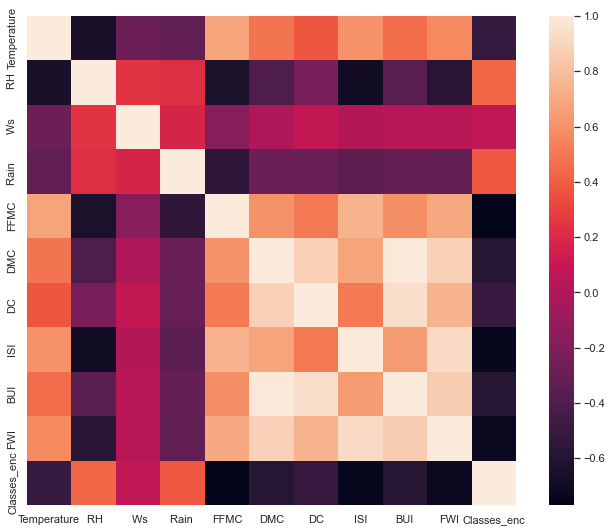

In [357]:
import matplotlib.pyplot as plt
import seaborn as sns
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True);

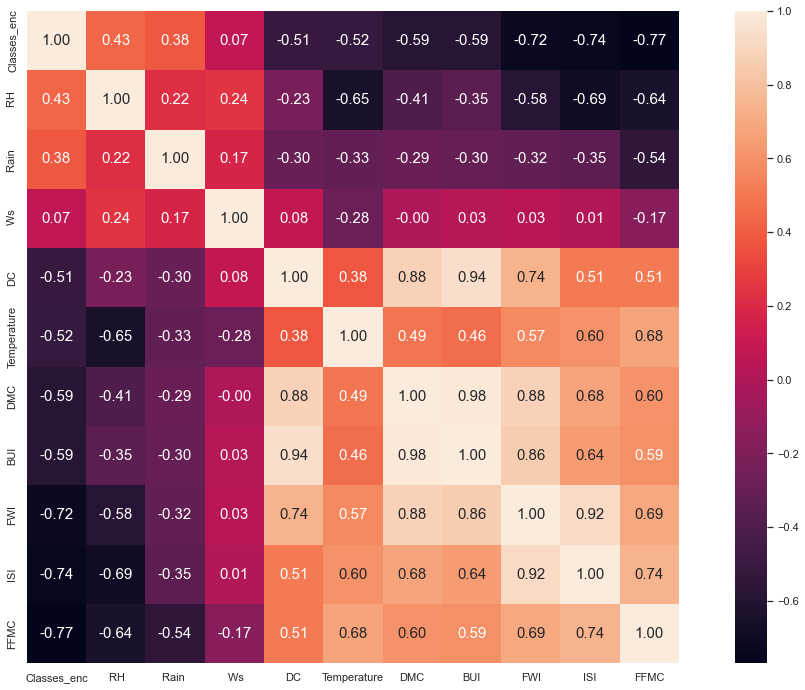

In [358]:
#correlation matrix
k = len(data.columns) #number of variables for heatmap
cols = corrmat.nlargest(k, 'Classes_enc')['Classes_enc'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(20, 12))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


In [359]:
data.columns

Index(['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes_enc'],
      dtype='object')

In [360]:
#Remove correlation below -0.6
data.drop('FFMC',axis=1,inplace=True)
data.drop('ISI',axis=1,inplace=True)
data.drop('FWI',axis=1,inplace=True)
data.head()


,Temperature,RH,Ws,Rain,DMC,DC,BUI,Classes_enc
0,29.0,57.0,18.0,0.0,3.4,7.6,3.4,1
1,29.0,61.0,13.0,1.3,4.1,7.6,3.9,1
2,26.0,82.0,22.0,13.1,2.5,7.1,2.7,1
3,25.0,89.0,13.0,2.5,1.3,6.9,1.7,1
4,27.0,77.0,16.0,0.0,3.0,14.2,3.9,1


# Prepare train and test dataset

In [361]:
#creating our X feature variables and y outcome variable
X = data.drop('Classes_enc',axis=1)
y = data['Classes_enc']

In [362]:
#splitting our data into training and testing data set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

# **Random Forest Classification**

In [363]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(X_train,y_train)


RandomForestClassifier()

In [364]:
#To predict target outcome using the test's set features
clf_pred=clf.predict(X_test)
print(clf_pred)

[0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1
 0 1 0 1 0 0 0 0 0 1 0 1]


In [365]:
# Transfer the array of predicted popularity of test data into dataframe
clf_pred_df = pd.DataFrame(data=clf_pred, columns=['Classes_enc'])
clf_pred_df.head(10)

,Classes_enc
0,0
1,1
2,0
3,0
4,0
5,1
6,0
7,1
8,1
9,1


In [366]:
RFprob_each = clf.predict_proba(X_test)
RFprob_each

array([[0.7 , 0.3 ],
       [0.36, 0.64],
       [0.99, 0.01],
       [0.94, 0.06],
       [0.99, 0.01],
       [0.31, 0.69],
       [1.  , 0.  ],
       [0.46, 0.54],
       [0.28, 0.72],
       [0.35, 0.65],
       [0.92, 0.08],
       [0.94, 0.06],
       [0.92, 0.08],
       [0.99, 0.01],
       [0.95, 0.05],
       [0.33, 0.67],
       [0.72, 0.28],
       [0.6 , 0.4 ],
       [0.  , 1.  ],
       [0.95, 0.05],
       [0.9 , 0.1 ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.61, 0.39],
       [0.  , 1.  ],
       [0.96, 0.04],
       [0.99, 0.01],
       [0.04, 0.96],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.6 , 0.4 ],
       [0.  , 1.  ],
       [0.76, 0.24],
       [0.95, 0.05],
       [0.97, 0.03],
       [0.  , 1.  ],
       [0.33, 0.67],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.98, 0.02],
       [0.01, 0.99],
       [0.97, 0.03],
       [0.93, 0.07],
       [0.74, 0.26],
       [0.97, 0.03],
       [0.94, 0.06],
       [0.  , 1.  ],
       [0.81,

In [367]:
pos_prob = []
for inner in RFprob_each:
    pos_prob.append(inner[1])
pos_prob[0:10]


[0.3, 0.64, 0.01, 0.06, 0.01, 0.69, 0.0, 0.54, 0.72, 0.65]

In [368]:
X_testdf = X_test.copy()
X_testdf.insert(len(X_testdf.columns),'y_test Classes_enc',y_test)
X_testdf=X_testdf.reset_index(drop=True)
X_testdf.head()

,Temperature,RH,Ws,Rain,DMC,DC,BUI,y_test Classes_enc
0,32.0,63.0,14.0,0.0,10.9,37.0,12.5,0
1,28.0,78.0,16.0,0.1,9.6,79.7,14.7,1
2,31.0,64.0,15.0,0.0,14.2,63.8,18.3,0
3,31.0,65.0,18.0,0.0,12.5,88.7,18.5,0
4,34.0,45.0,18.0,0.0,18.7,46.4,18.7,0


In [369]:
# Insert result, check the prediction correctness
X_testdf.insert(len(X_testdf.columns), 'RForest', clf_pred_df['Classes_enc'])
X_testdf.head()


,Temperature,RH,Ws,Rain,DMC,DC,BUI,y_test Classes_enc,RForest
0,32.0,63.0,14.0,0.0,10.9,37.0,12.5,0,0
1,28.0,78.0,16.0,0.1,9.6,79.7,14.7,1,1
2,31.0,64.0,15.0,0.0,14.2,63.8,18.3,0,0
3,31.0,65.0,18.0,0.0,12.5,88.7,18.5,0,0
4,34.0,45.0,18.0,0.0,18.7,46.4,18.7,0,0


# **Naive Bayes**

In [370]:
from sklearn.naive_bayes import GaussianNB

gaus = GaussianNB()
gaus.fit(X_train, y_train)

GaussianNB()

In [371]:
#To predict target outcome using the test's set features
NB_pred= gaus.predict(X_test)
print(NB_pred)

[0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 1
 0 1 0 1 0 0 0 0 0 1 0 1]


In [372]:
# Transfer the array of predicted popularity of test data into dataframe
NB_pred_df = pd.DataFrame(data=NB_pred, columns=['Classes_enc'])
NB_pred_df.head(10)

,Classes_enc
0,0
1,0
2,0
3,0
4,0
5,1
6,0
7,1
8,1
9,1


In [373]:
NBprob_each = gaus.predict_proba(X_test)
NBprob_each

array([[7.49084444e-001, 2.50915556e-001],
       [6.70469682e-001, 3.29530318e-001],
       [9.83883578e-001, 1.61164223e-002],
       [9.92121615e-001, 7.87838544e-003],
       [9.99427501e-001, 5.72498624e-004],
       [1.63743861e-054, 1.00000000e+000],
       [9.12490098e-001, 8.75099020e-002],
       [1.79098830e-001, 8.20901170e-001],
       [0.00000000e+000, 1.00000000e+000],
       [2.79143255e-046, 1.00000000e+000],
       [1.00000000e+000, 5.45195619e-012],
       [1.00000000e+000, 5.21769340e-024],
       [1.84097261e-001, 8.15902739e-001],
       [1.00000000e+000, 2.62663850e-042],
       [9.92780815e-001, 7.21918450e-003],
       [7.11629010e-002, 9.28837099e-001],
       [9.93715051e-001, 6.28494949e-003],
       [4.37193693e-001, 5.62806307e-001],
       [1.06688192e-271, 1.00000000e+000],
       [9.96366181e-001, 3.63381904e-003],
       [9.37529261e-001, 6.24707392e-002],
       [1.09351785e-014, 1.00000000e+000],
       [1.84327335e-007, 9.99999816e-001],
       [1.0

In [374]:
pos_prob = []
for inner in NBprob_each:
    pos_prob.append(inner[1])
pos_prob[0:10]


[0.25091555560474593,
 0.32953031772314345,
 0.01611642230330205,
 0.007878385435967472,
 0.0005724986240134331,
 1.0,
 0.08750990198156015,
 0.8209011702150559,
 1.0,
 1.0]

In [375]:
# Insert result, check the prediction correctness
X_testdf.insert(len(X_testdf.columns), 'NBGaus', NB_pred_df['Classes_enc'])
X_testdf.head()

,Temperature,RH,Ws,Rain,DMC,DC,BUI,y_test Classes_enc,RForest,NBGaus
0,32.0,63.0,14.0,0.0,10.9,37.0,12.5,0,0,0
1,28.0,78.0,16.0,0.1,9.6,79.7,14.7,1,1,0
2,31.0,64.0,15.0,0.0,14.2,63.8,18.3,0,0,0
3,31.0,65.0,18.0,0.0,12.5,88.7,18.5,0,0,0
4,34.0,45.0,18.0,0.0,18.7,46.4,18.7,0,0,0


# **KNN Classification**

In [376]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier 

# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

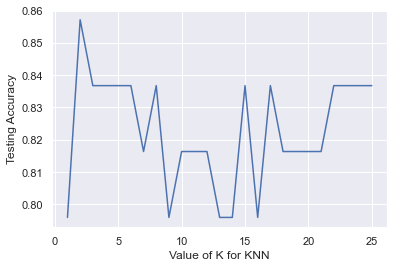

In [377]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [378]:
#Selection of n_neighbours as we do not want to underfit / overfit
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [379]:
#To predict target outcome using the test's set features
KNN_pred= knn.predict(X_test)
print(KNN_pred)

[0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1
 0 1 0 1 0 0 0 0 0 1 0 0]


In [380]:
# Transfer the array of predicted popularity of test data into dataframe
KNpredct_df = pd.DataFrame(data=KNN_pred, columns=['Classes_enc'])
KNpredct_df.head(10)

,Classes_enc
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,1


In [381]:
KNprob_each = knn.predict_proba(X_test)
KNprob_each

array([[0.71428571, 0.28571429],
       [0.71428571, 0.28571429],
       [0.71428571, 0.28571429],
       [0.71428571, 0.28571429],
       [0.85714286, 0.14285714],
       [0.85714286, 0.14285714],
       [0.85714286, 0.14285714],
       [0.57142857, 0.42857143],
       [0.14285714, 0.85714286],
       [0.28571429, 0.71428571],
       [1.        , 0.        ],
       [0.71428571, 0.28571429],
       [0.71428571, 0.28571429],
       [1.        , 0.        ],
       [0.85714286, 0.14285714],
       [0.71428571, 0.28571429],
       [0.85714286, 0.14285714],
       [0.57142857, 0.42857143],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.42857143, 0.57142857],
       [0.        , 1.        ],
       [0.71428571, 0.28571429],
       [0.85714286, 0.14285714],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.

In [382]:
pos_prob = []
for inner in KNprob_each:
    pos_prob.append(inner[1])
pos_prob[0:10]

[0.2857142857142857,
 0.2857142857142857,
 0.2857142857142857,
 0.2857142857142857,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.42857142857142855,
 0.8571428571428571,
 0.7142857142857143]

In [383]:
# Insert result, check the prediction correctness
X_testdf.insert(len(X_testdf.columns), 'KNeigh', KNpredct_df['Classes_enc'])
X_testdf.head()


,Temperature,RH,Ws,Rain,DMC,DC,BUI,y_test Classes_enc,RForest,NBGaus,KNeigh
0,32.0,63.0,14.0,0.0,10.9,37.0,12.5,0,0,0,0
1,28.0,78.0,16.0,0.1,9.6,79.7,14.7,1,1,0,0
2,31.0,64.0,15.0,0.0,14.2,63.8,18.3,0,0,0,0
3,31.0,65.0,18.0,0.0,12.5,88.7,18.5,0,0,0,0
4,34.0,45.0,18.0,0.0,18.7,46.4,18.7,0,0,0,0


# **Decision Tree**

In [384]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [385]:
#To predict target outcome using the test's set features
model_pred=model.predict(X_test)
print(model_pred)

[0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1
 0 1 0 1 0 0 1 0 0 1 0 1]


In [386]:
# Transfer the array of predicted popularity of test data into dataframe
model_pred_df = pd.DataFrame(data=model_pred, columns=['Classes_enc'])
model_pred_df.head(10)

,Classes_enc
0,0
1,1
2,0
3,0
4,0
5,1
6,0
7,1
8,1
9,1


In [387]:
DTprob_each = model.predict_proba(X_test)
DTprob_each

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [388]:
pos_prob = []
for inner in DTprob_each:
    pos_prob.append(inner[1])
pos_prob[0:10]


[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0]

In [389]:
# Insert result, check the prediction correctness
X_testdf.insert(len(X_testdf.columns), 'DecisionT', model_pred_df['Classes_enc'])
X_testdf.head()

,Temperature,RH,Ws,Rain,DMC,DC,BUI,y_test Classes_enc,RForest,NBGaus,KNeigh,DecisionT
0,32.0,63.0,14.0,0.0,10.9,37.0,12.5,0,0,0,0,0
1,28.0,78.0,16.0,0.1,9.6,79.7,14.7,1,1,0,0,1
2,31.0,64.0,15.0,0.0,14.2,63.8,18.3,0,0,0,0,0
3,31.0,65.0,18.0,0.0,12.5,88.7,18.5,0,0,0,0,0
4,34.0,45.0,18.0,0.0,18.7,46.4,18.7,0,0,0,0,0


# **Evaluation of Classifiers**

In [390]:
#Import relevant metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [391]:
#RANDOM FOREST
acRF=accuracy_score(y_test,clf_pred)
fscoreRF=f1_score(y_test,clf_pred)
conmatrixRF = confusion_matrix(y_test,clf_pred)

#NAIVE BAYES
acNB=accuracy_score(y_test,NB_pred)
fscoreNB = f1_score(y_test,NB_pred)
conmatrixNB = confusion_matrix(y_test,NB_pred)

#K NEIGHBOURS
acKNN=accuracy_score(y_test,KNN_pred)
fscoreKNN=f1_score(y_test,KNN_pred)
conmatrixKNN = confusion_matrix(y_test,KNN_pred)

#DECISION TREE
acDTree = accuracy_score(y_test,model_pred)
fscoreDTree = f1_score(y_test,model_pred)
conmatrixDTree = confusion_matrix(y_test,model_pred)


In [392]:
df = pd.DataFrame(
    {
        "KNeigh": [acKNN, fscoreKNN, conmatrixKNN],
        "Naive Bayes": [acNB, fscoreNB, conmatrixNB],
        "Random Forest": [acRF, fscoreRF, conmatrixRF],
        "Decision Tree": [acDTree, fscoreDTree, conmatrixDTree]
    },
    columns=["KNeigh", "Naive Bayes", "Random Forest", "Decision Tree"],
    index = ["Accuracy", "Fscore", "Confusion Matrix"])
df



,KNeigh,Naive Bayes,Random Forest,Decision Tree
Accuracy,0.816327,0.836735,0.918367,0.918367
Fscore,0.742857,0.8,0.894737,0.9
Confusion Matrix,"[[27, 4], [5, 13]]","[[25, 6], [2, 16]]","[[28, 3], [1, 17]]","[[27, 4], [0, 18]]"
